# Hola Macarena!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

# Comentario General

Hola, Macarena, te felicito por el desarrollo del proyecto. Lograste completar las diferentes secciones de muy buena manera.

# Proyecto 13: Pronósticos & Predicciones

## Introducción

El contexto de trabajo se desarrolla dentro de la cadena de gimansios *"Model Fitness"*, la cual pretende desarrollar una estrategia de interacción con sus clientes, con el fin de evitar la cancelación; es decir, la pérdida de clientes.
Para esto, "Model Fitness ha digitalizado varios de sus perfiles de clientes. Estos datos serán analizados y se trabajará con ellos con el objetivo de elaborar una estrategia de retención de clientes.

## Descripción de los datos

Campos del dataset.

Datos del usuario del mes anterior:
- *gender*: género del usuario
- *Near_Location*: 1 si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- *Partner*: 1 si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- *Promo_friends* 1 si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- *Phone*: 1 si el/la usuario/a aportó el número de teléfono.
- *Age*: edad del usuario
- *Lifetime*: el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
- *Contract_period*: 1 mes, 3 meses, 6 meses o 1 año.
- *Month_to_end_contract*: los meses que faltan hasta que expire el contrato.
- *Group_visits*: 1 si el/la usuario/a participa en sesiones grupales.
- *Avg_class_frequency_total*: frecuencia media de visitas por semana a lo largo de la vida del cliente.
- *Avg_class_frequency_current_month*: frecuencia media de visitas por semana durante el mes en curso.
- *Avg_additional_charges_total*: cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.
- *Churn*: la cancelación para el mes en cuestión; 1 si ha cancelado.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo estructurando esta sección de introducción del proyecto.  </div> 

## Importar librerias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto.  </div> 

## Preparar los datos

In [4]:
# Cargar datos
gym = pd.read_csv(r'C:\Users\macaa\OneDrive\Escritorio\TripleTen\Sprint 13\gym_churn_us.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo cargando el dataset.   </div> 

In [5]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
# Contenido del dataset
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

No hay valores ausentes

In [7]:
# Duplicados explícitos
print(f'Hay {gym.duplicated().sum()} duplicados') 

Hay 0 duplicados


In [8]:
# Cambiar mayúsculas de los nombres de columnas (formato PEP8)
gym.columns = gym.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo explorando de manera inicial el contenido del dataset.   </div> 

## Análisis exploratorio de datos

In [9]:
# Tamaño del dataset
gym.shape

(4000, 14)

In [10]:
# Resumen estadístico
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observando el promedio de las características binarias; se desprende de la información si hay tendencia hacia el 1 o 0; con esto podemos decir que:  
- En cuanto a género la distribución de clientes parece similar entre hombres y mujeres.
- Hay inclinación en cuanto a que la mayoría de los clientes reside cerca del gimnasio.
- En cuanto a que se hayan inscrito por la promoción "promo friends" o si son de una compañía asociada al gimnasio, la tendencia es a no para ambas características.
- La mayoría no participa en sesiones grupales.
- Y casi todos aportan su número de teléfono.
- Para la cancelación; la mayoría no abandona en el mes en cuestión.
En cuanto a la edad de los clientes, se encuentran entre los 18 y 41 años, con un promedio de 29.


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo explorando los estadísticos principales para cada una de las características.   </div> 

In [11]:
# Valores medios de las cacracterísticas para las personas que se fueron (1) y las que se quedaron(0)
for column in gym.columns:
    print()
    print(column) 
    print(gym.groupby('churn')[column].mean())


gender
churn
0    0.510037
1    0.510839
Name: gender, dtype: float64

near_location
churn
0    0.873086
1    0.768143
Name: near_location, dtype: float64

partner
churn
0    0.534195
1    0.355325
Name: partner, dtype: float64

promo_friends
churn
0    0.353522
1    0.183789
Name: promo_friends, dtype: float64

phone
churn
0    0.903709
1    0.902922
Name: phone, dtype: float64

contract_period
churn
0    5.747193
1    1.728558
Name: contract_period, dtype: float64

group_visits
churn
0    0.464103
1    0.268615
Name: group_visits, dtype: float64

age
churn
0    29.976523
1    26.989632
Name: age, dtype: float64

avg_additional_charges_total
churn
0    158.445715
1    115.082899
Name: avg_additional_charges_total, dtype: float64

month_to_end_contract
churn
0    5.283089
1    1.662582
Name: month_to_end_contract, dtype: float64

lifetime
churn
0    4.711807
1    0.990575
Name: lifetime, dtype: float64

avg_class_frequency_total
churn
0    2.024876
1    1.474995
Name: avg_class_freque

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo estudiando los valores medios de las características sujetos al estado de cancelación de la membresía  de los clientes.   </div> 

Dentro de las características; en donde se notan más diferencias entre aquellos clientes que se fueron vs los que se quedaron es en "contract_period" y "month_to_end_contract"; donde al parecer quienes permanecen suelen contratar mayormente el plan del gimnasio por 6 o 12 meses, mientras que para los clientes que cancelan al parecer van contratando la mensualidad.
También hay diferencias para "lifetime"; pues quienes suelen permaneccer, son en promedio aquellos que llevan poco más de 4 meses, mientras los que se van son quienes se mantienen activos sólo durante el mes. 

In [12]:
# Separación de grupos según cancelación
permanence = gym[gym['churn'] == 0]
desertion = gym[gym['churn'] == 1]

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


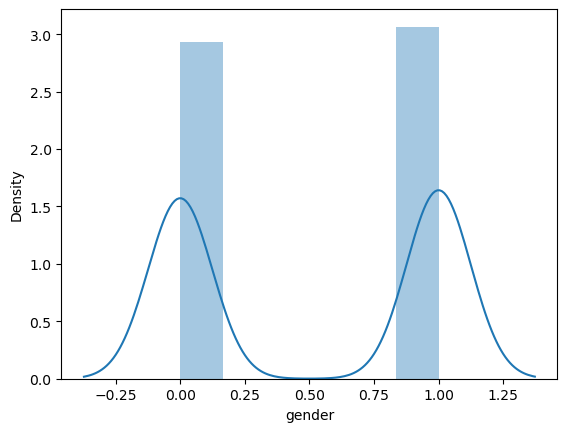

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


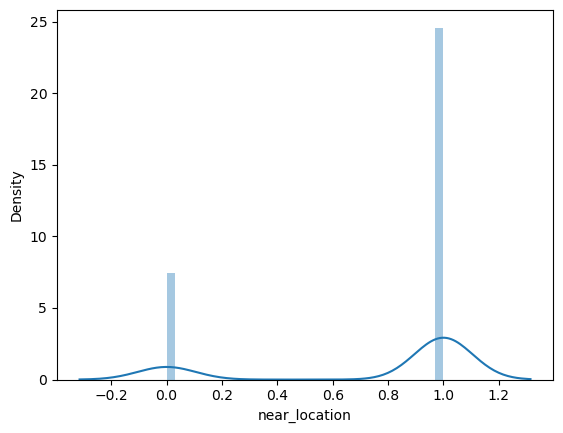

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


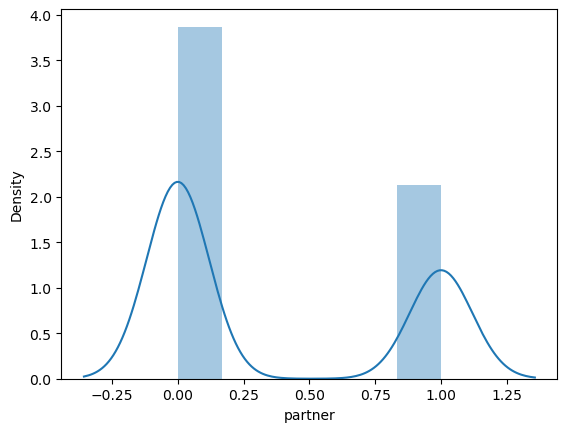

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


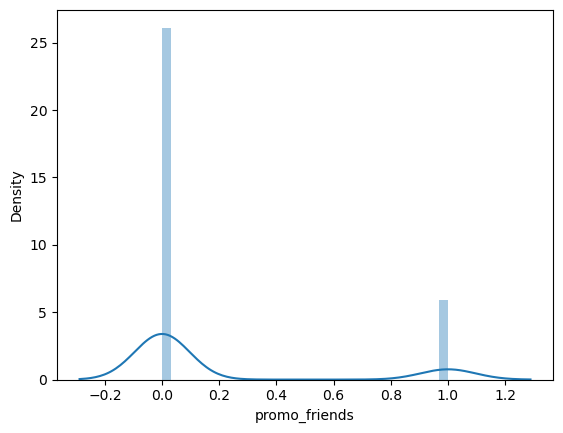

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


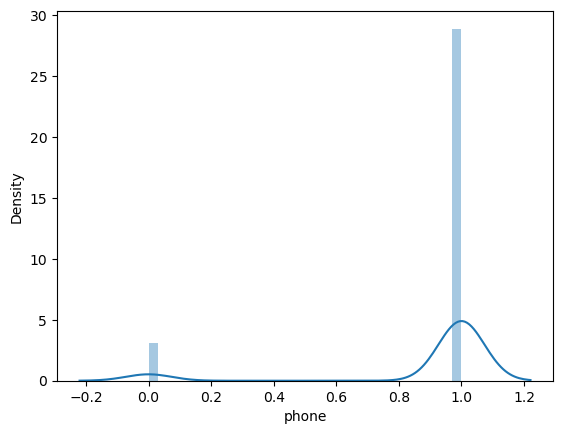

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


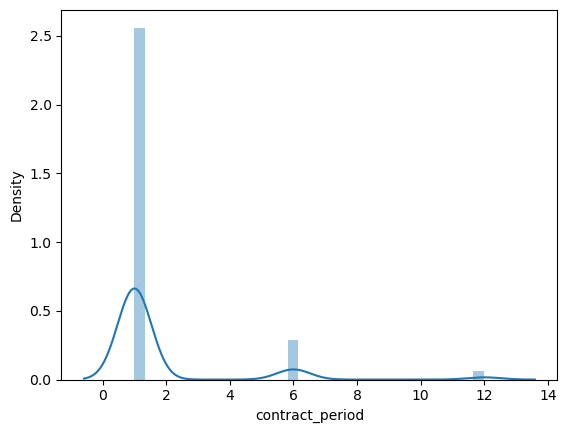

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


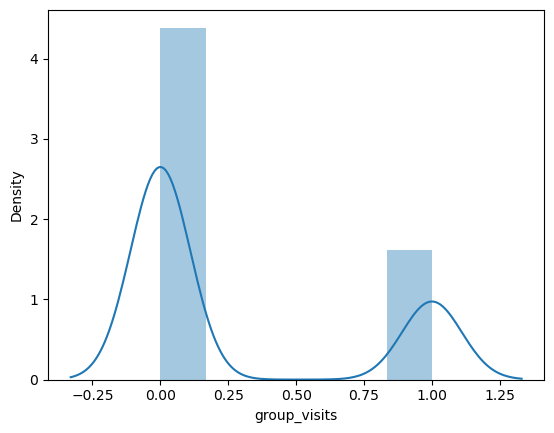

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


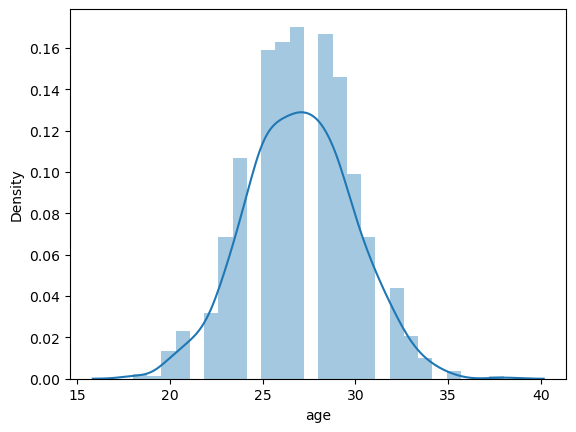

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


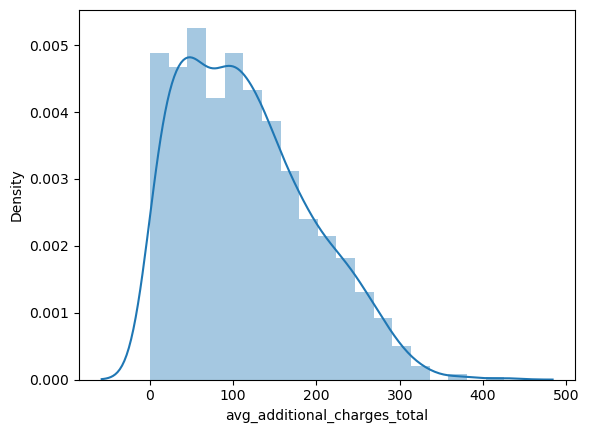

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


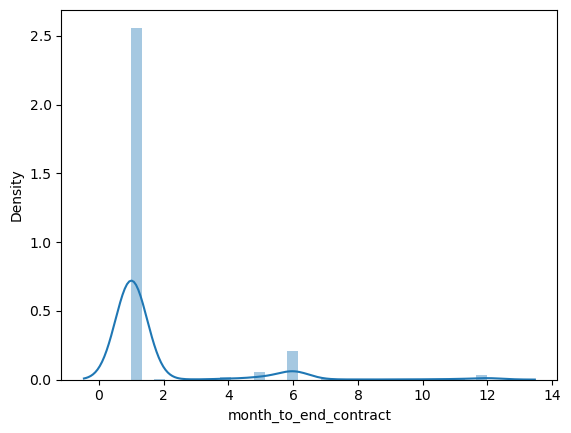

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


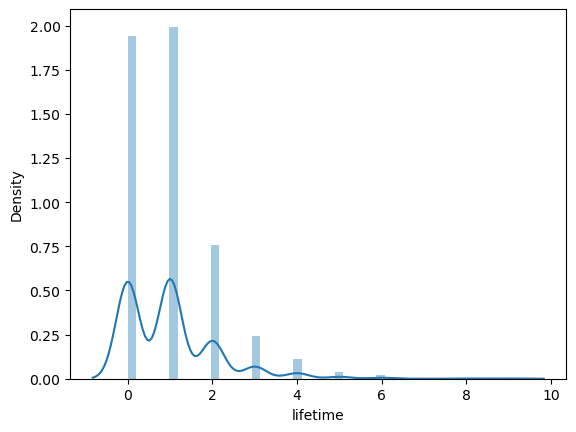

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


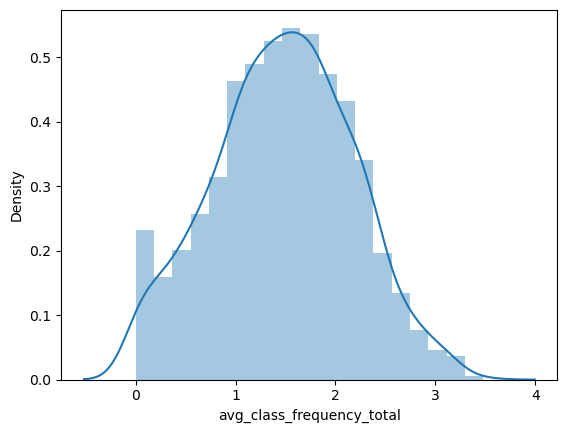

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


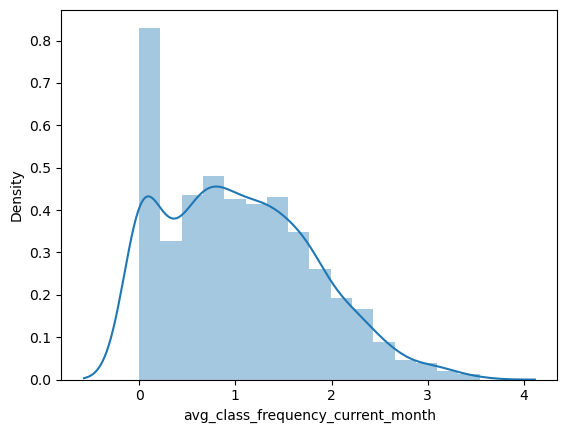

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\3651707558.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(desertion[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


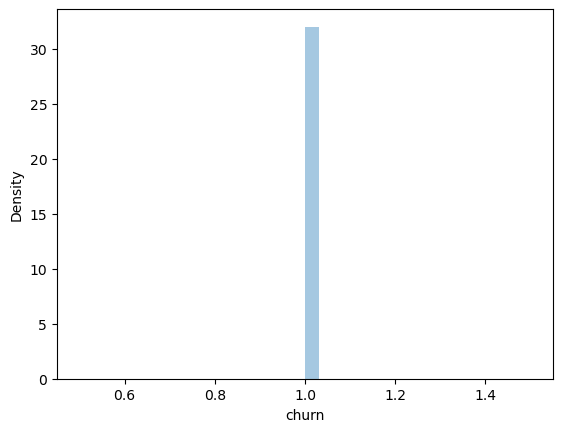

In [13]:
# Distribución de las características para que aquellos que cancelaron
for column in desertion.columns:
    sns.distplot(desertion[column])
    plt.show()

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


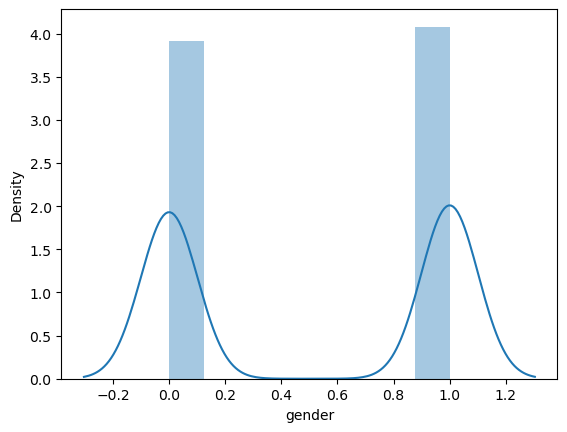

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


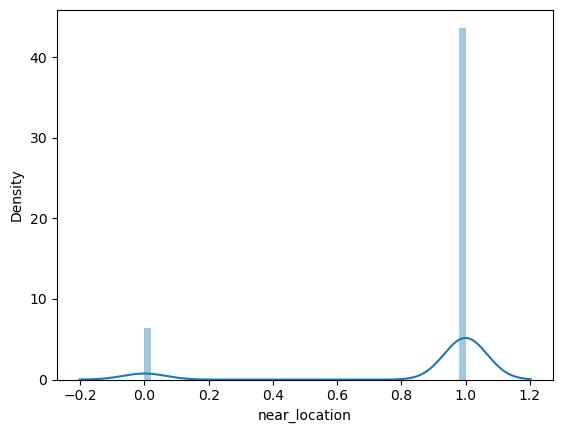

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


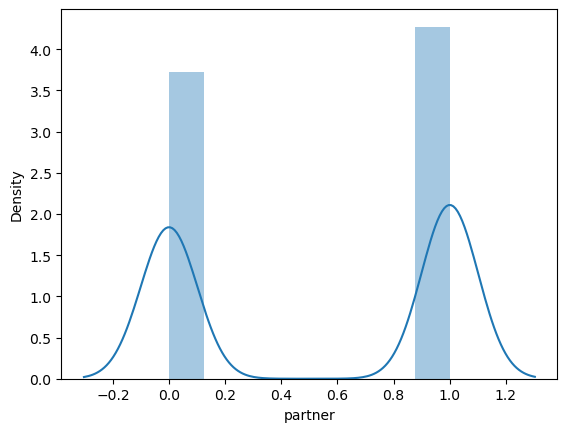

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


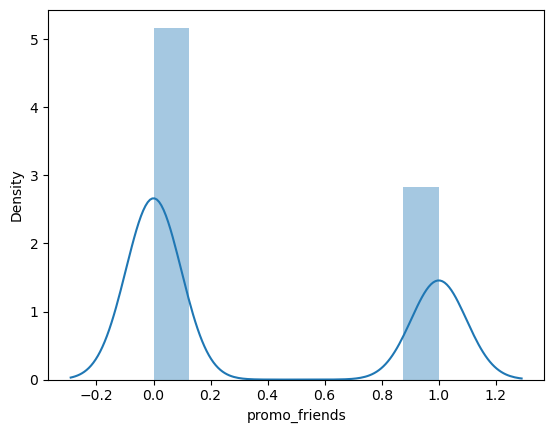

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


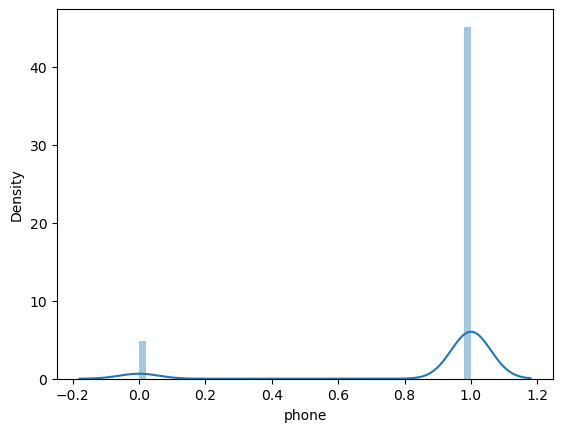

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


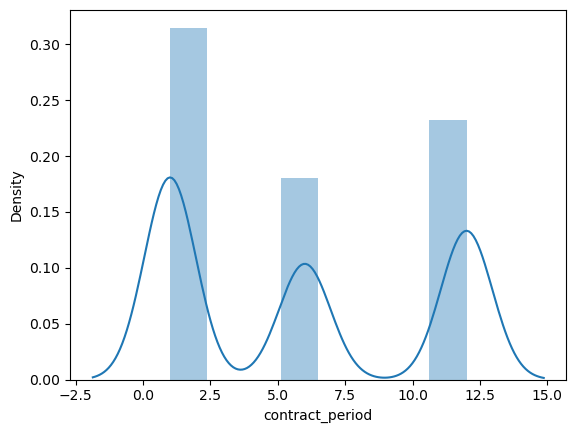

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


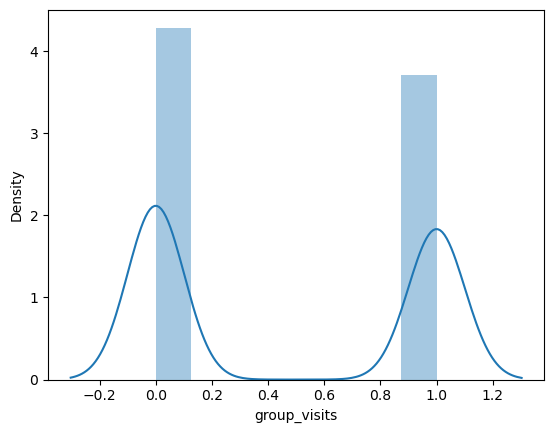

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


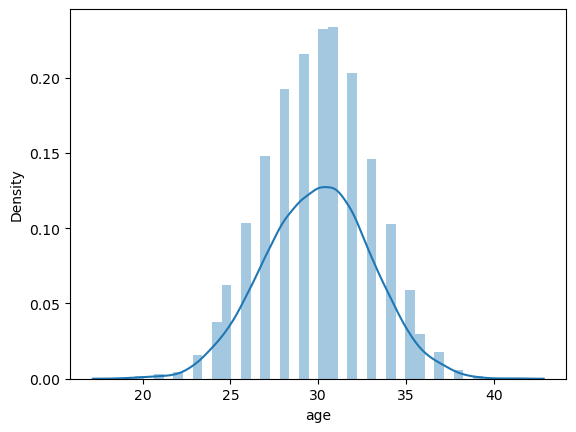

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


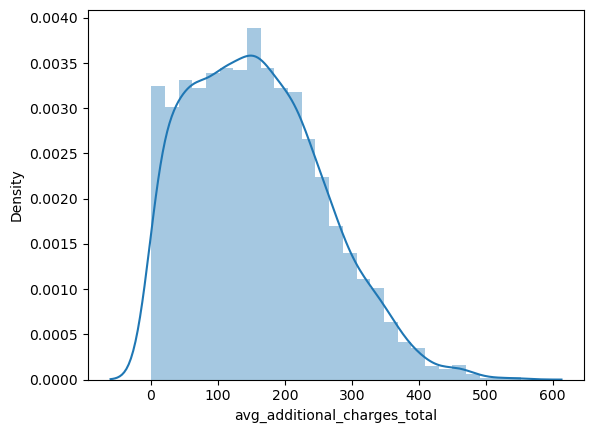

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


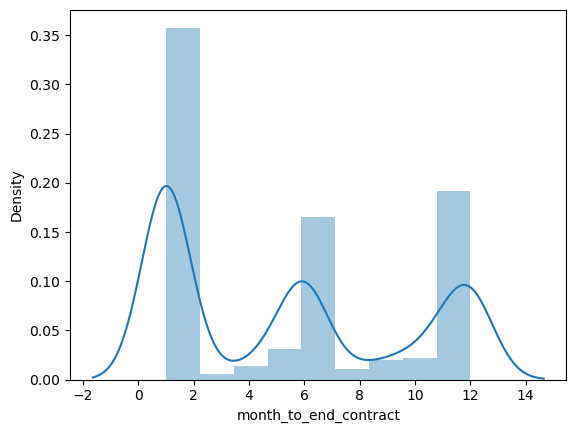

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


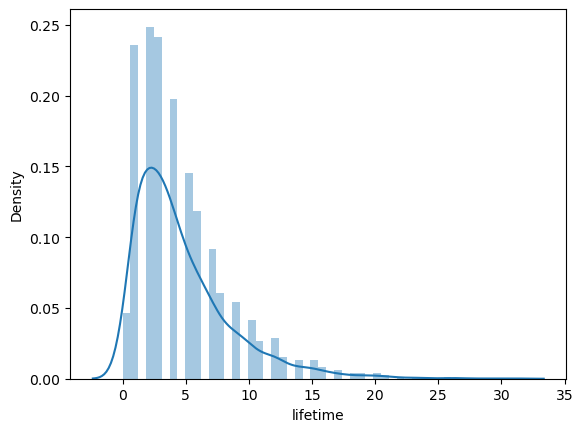

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


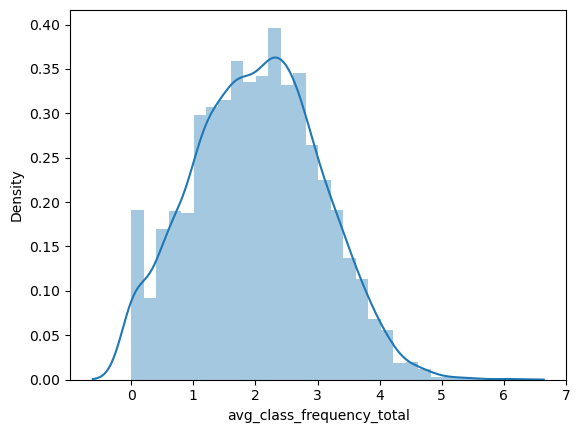

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


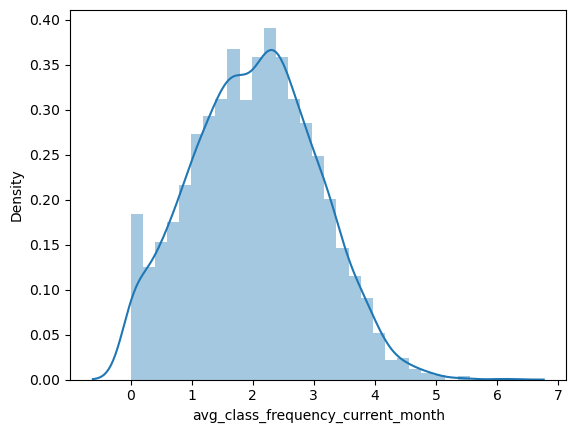

C:\Users\macaa\AppData\Local\Temp\ipykernel_23284\2915934520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(permanence[column])
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


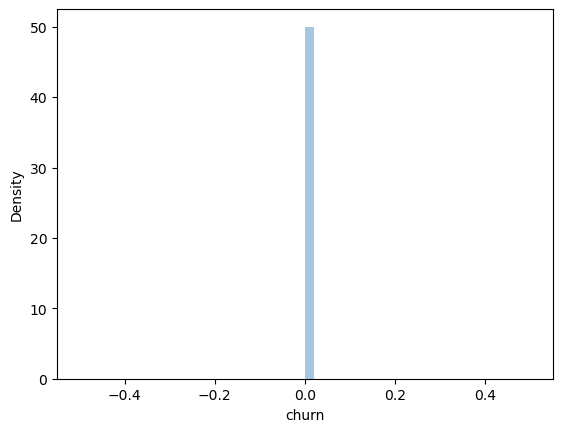

In [14]:
# Distribución de las características para que aquellos usuarios que permanecen
for column in permanence.columns:
    sns.distplot(permanence[column])
    plt.show()

Principales diferencias entre aquellos clientes que cancelan y los que no: 
- Sólo unos pocos de los clientes que permanecen son de una compañía acosiada al gimnasio, a diferencia de los clientes que cancelan; el doble de usuarios trabaja en alguna compañía asociada al gimnasio.
- La duración del plan contratado es más variado entre los usarios que permanecen; 12, 6 y 1 mes, aunque el plan mes a mes es el más solicitado. Sin embargo, en los usuarios que cancelan son muy pocos los que contratan el plan de 6 o 12 meses, casi en su totalidad tienen el plan mensual.
- Entre los usuarios que se quedan en el gimnasio es poca la diferencia entre quienes toman clases grupales y los que no, a diferencia de los usuarios que cancelan; la gran mayoría no toma clases grupales.
- Abandonan los clientes durante el mes que les queda para finalizar su contrato. 
- Los usuarios que cancelan son nuevos clientes, mientras que quienes permanecen son clientes que llevan más de 2-3 meses.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo estudiando las distribuciones de las características sujetas al estado de cancelación de la membresia  de los clientes.  </div> 

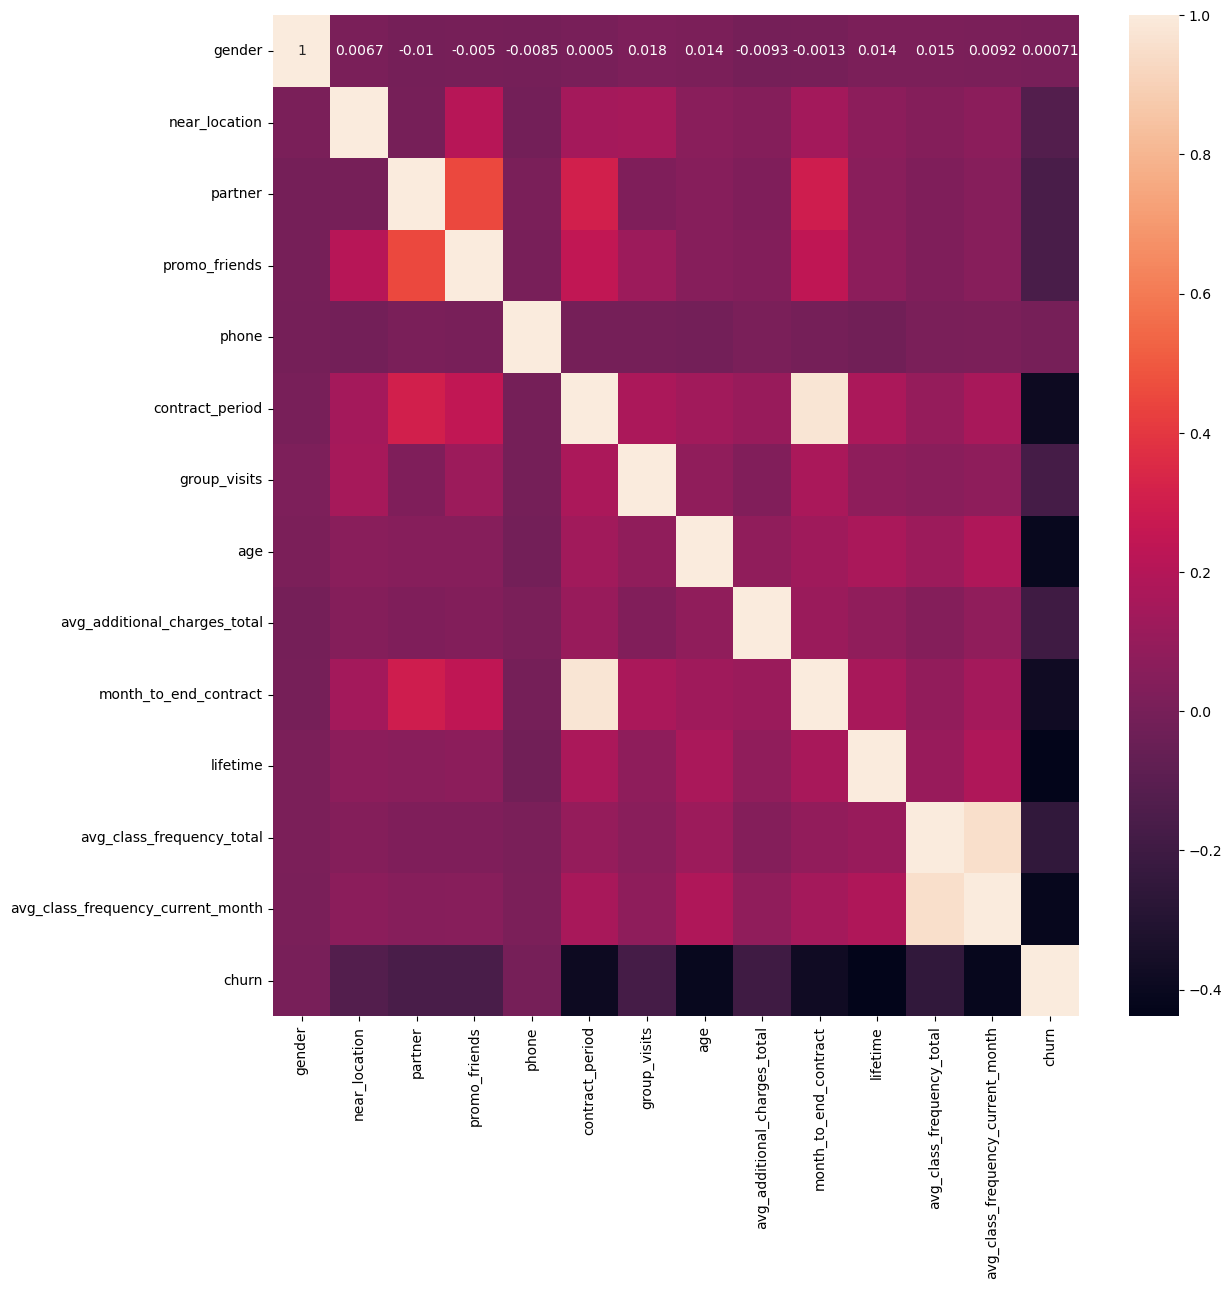

In [15]:
# Matriz de correlación
plt.figure(figsize=(13,13))
sns.heatmap(gym.corr(), annot=True)
plt.show()

En general, las características del conjunto de datos no se correlacionan entre sí, salvo algunos puntos a considerar:
- 'avg_class_frequency_total' se correlaciona fuertemente con 'avg_class_frequency_current_month' de manera tal que el promedio de clases que toman los clientes por semana, se mantiene durante todo su ciclo de vida, van al gimnasio de manera constante la misma cantidad de veces cada semana.
- 'month_to_end_contract' se correlaciona fuertemente con 'contract_period' esto se debe principalmente, a que como vimos en el análisis realizado hasta el momento; la gran mayoría de los usuario contrata el plan por 1 mes, de modo que les resta 1 mes para finalizar su período de contrato.  

Por lo demás; ninguna característica se correlaciona con la variable objetivo 'churn'.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo estructurando el heatmap con la matriz de correlaciones lineales entre las características. </div> 

## Construcción de un modelo para predecir la cancelación

In [16]:
# Dividir los datos en características y una variable objetivo
X = gym.drop('churn', axis=1)
y = gym['churn']

In [17]:
# Estandarizar los datos
scaler = StandardScaler()
scaler.fit(X)
X_st = scaler.transform(X)

In [18]:
# Crear el modelo de Regresión Logística
model = LogisticRegression()

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_st_train, X_st_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2, random_state=0)

In [20]:
# Entrenar el modelo
model.fit(X_st_train, y_train)

LogisticRegression()

In [21]:
# Calcular probabilidad y hacer predicción con el modelo entrenado
probabilities = model.predict_proba(X_st_test)
predictions = model.predict(X_st_test)

In [22]:
print('Métricas de la predicción para LogisticRegression')
print('La exactitud del modelo logístico es {:.2f}'.format(accuracy_score(y_test, predictions)))
print('La precisión del modelo logístico es {:.2f}'.format(precision_score(y_test, predictions)))
print('La recuperación del modelo logístico es {:.2f}'.format(recall_score(y_test, predictions)))

Métricas de la predicción para LogisticRegression
La exactitud del modelo logístico es 0.92
La precisión del modelo logístico es 0.85
La recuperación del modelo logístico es 0.83


In [23]:
# Crear modelo de Bosque aleatorio
for n_forest in range(10,120, 10):
    model_rf = RandomForestClassifier(n_estimators=n_forest)
    
    model_rf.fit(X_st_train, y_train)             # Entrenar el modelo
    predict_forest = model_rf.predict(X_st_test)  # Calcular predicciones
    
    print(f'Métricas con RandomForestClassifier de {n_forest}')  # Calcular métricas para el modelo
    print('La exactitud del modelo logístico es {:.2f}'.format(accuracy_score(y_test, predict_forest)))
    print('La precisión del modelo logístico es {:.2f}'.format(precision_score(y_test, predict_forest)))
    print('La recuperación del modelo logístico es {:.2f}'.format(recall_score(y_test, predict_forest)))
    print()

Métricas con RandomForestClassifier de 10
La exactitud del modelo logístico es 0.91
La precisión del modelo logístico es 0.85
La recuperación del modelo logístico es 0.75

Métricas con RandomForestClassifier de 20
La exactitud del modelo logístico es 0.90
La precisión del modelo logístico es 0.83
La recuperación del modelo logístico es 0.76

Métricas con RandomForestClassifier de 30
La exactitud del modelo logístico es 0.93
La precisión del modelo logístico es 0.88
La recuperación del modelo logístico es 0.82

Métricas con RandomForestClassifier de 40
La exactitud del modelo logístico es 0.91
La precisión del modelo logístico es 0.83
La recuperación del modelo logístico es 0.81

Métricas con RandomForestClassifier de 50
La exactitud del modelo logístico es 0.91
La precisión del modelo logístico es 0.84
La recuperación del modelo logístico es 0.77

Métricas con RandomForestClassifier de 60
La exactitud del modelo logístico es 0.92
La precisión del modelo logístico es 0.85
La recuperació

*LogisticRegression fue el modelo que dió mejores resultados*, considerando incluso que RandomForestClassifier se probó con diferente cantidad de "árboles". Este modelo para ningún valor de n_estimators probado dió mejores valores para las métricas de LogisticRegression:  
- Exactitud del modelo logístico de 0.92
- Precisión del modelo logístico de 0.85
- Recuperación del modelo logístico de 0.83

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo desplegando y evaluando los modelos. </div> 

## Clústeres de usuarios

In [24]:
# Crear una matriz de distancias
linked = linkage(X_st, method='ward')

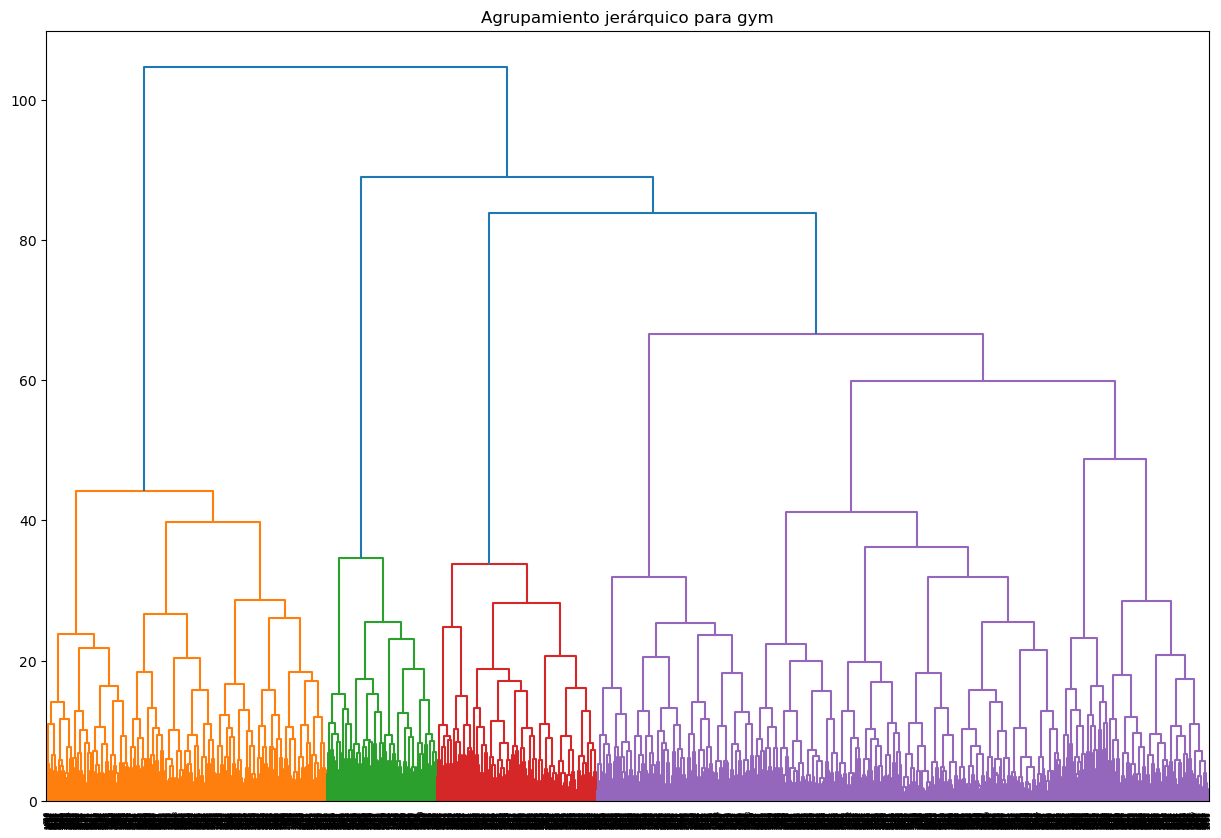

In [25]:
# Trazar el dendrograma
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Agrupamiento jerárquico para gym')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo estructurando el dendograma.

In [26]:
# Clustering KMeans
km = KMeans(n_clusters=5)

In [27]:
# Predecir los clústeres
labels = km.fit_predict(X_st)

c:\Users\macaa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# Almacenar los clusteres en el dataset
gym['cluster_km'] = labels

In [29]:
# Valores medios de las características por clúster
cluster = gym.groupby('cluster_km').mean()
cluster

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
1,0.486862,0.998454,0.822257,1.000000,0.897991,3.162287,0.457496,29.234930,141.948312,2.924266,3.734158,1.743497,1.637843,0.245750
2,0.587240,0.971354,0.261719,0.088542,0.906250,2.820312,0.476562,30.110677,162.089924,2.593750,5.169271,2.877593,2.879094,0.067708
3,0.498932,0.944444,0.740385,0.485043,0.900641,11.884615,0.551282,29.931624,164.625700,10.877137,4.674145,1.999110,1.990516,0.022436
4,0.486878,1.000000,0.241629,0.020814,0.901357,1.979186,0.320362,28.222624,130.918371,1.898643,2.375566,1.271595,1.028307,0.528507


<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo usando el algoritmo kmeans y estructurando la tabla agrupada para estudiar los valores medios de las características sujeto a los clusters creados.

Se observa una tendencia entre los clientes del gimnasio que contratan el plan anual; tienden a ser de una compañía asociada y/o a llegar por "promo friends". Estos mismos usuarios también tienden a ser quienes asisten a clases grupales, a diferencia de los otros perfiles de usuarios.  
Sin embargo, son los usuarios que tienden a abandonar, quizá porque van con alguien conocido a entrenar, y luego si uno de ellos deja de ir, el otro también abandona.  



In [30]:
# Gráficos de distribución de características por cluster
def chart(df, cluster, features):
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=feature, hue=cluster, kde=True, palette='viridis')
        plt.show()

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


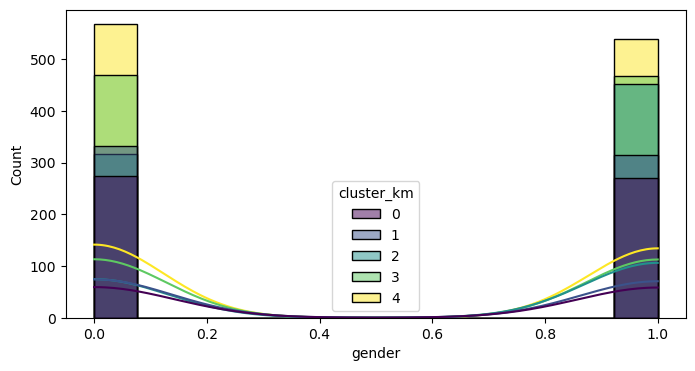

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


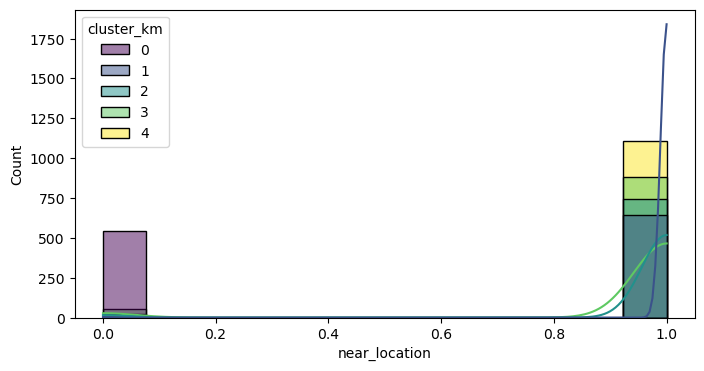

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


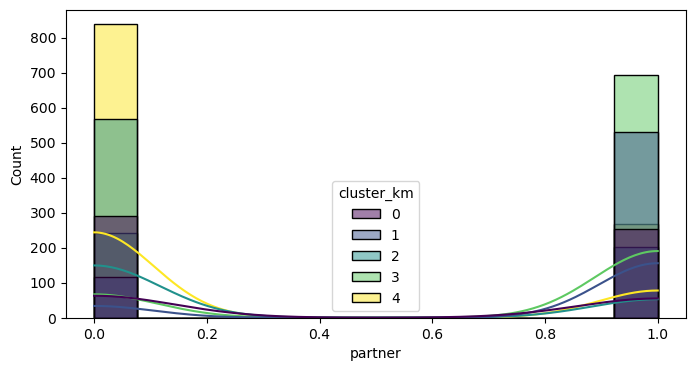

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


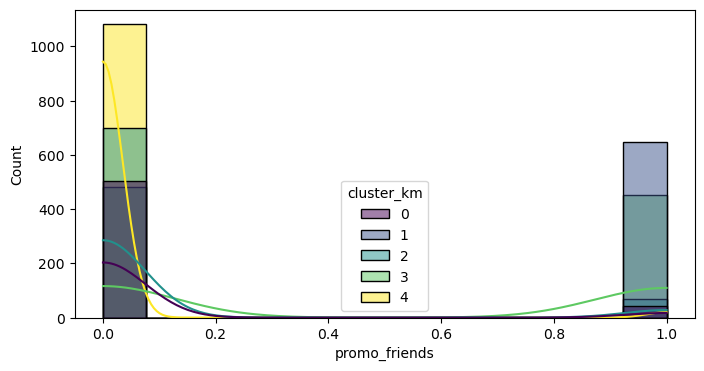

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


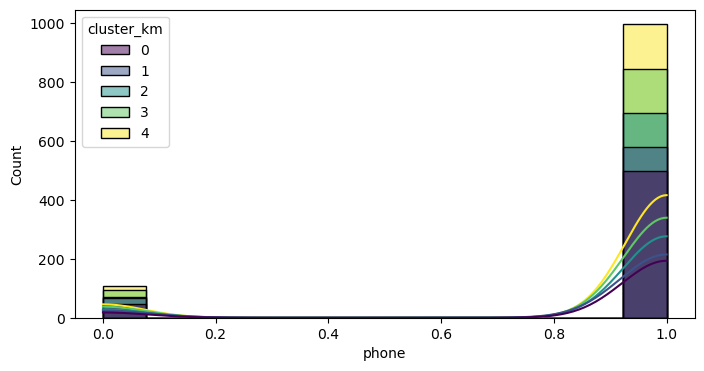

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


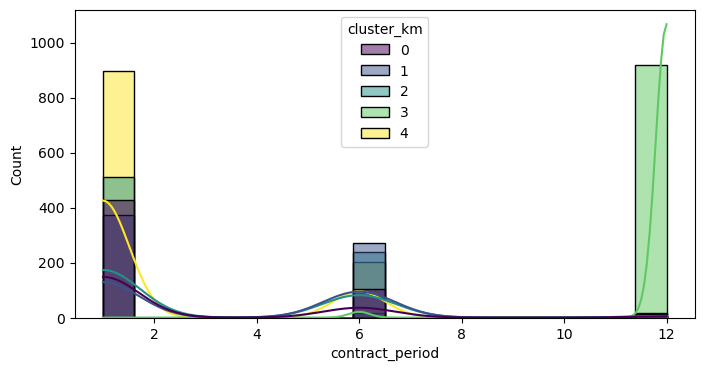

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


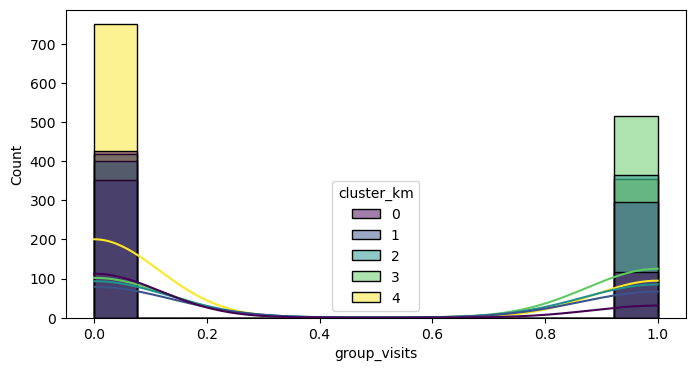

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


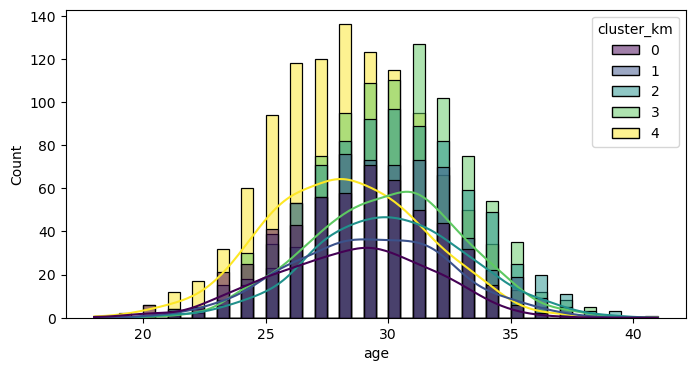

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


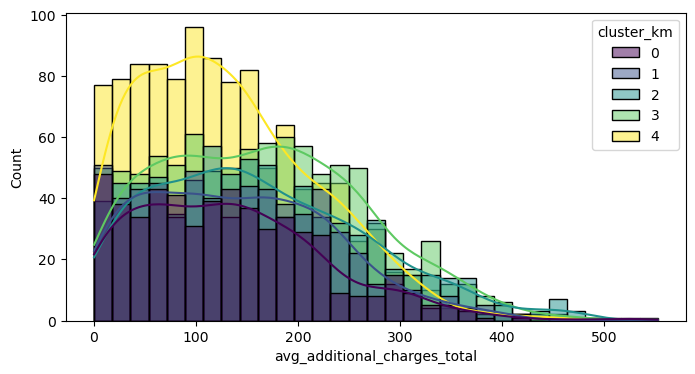

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


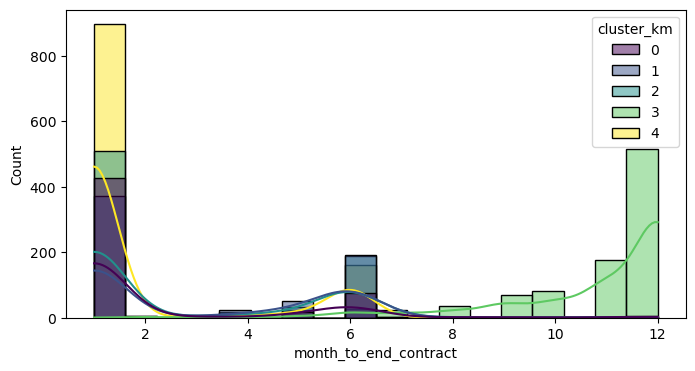

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


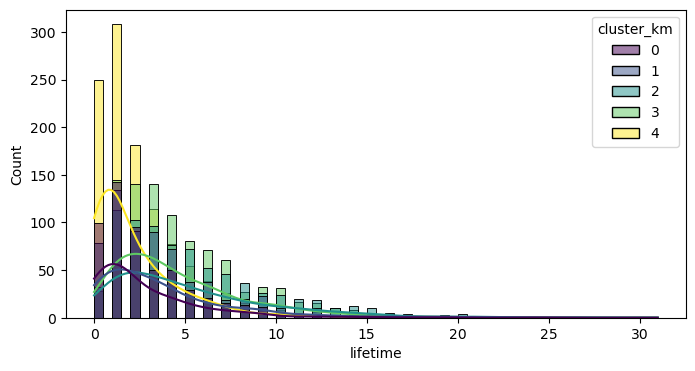

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


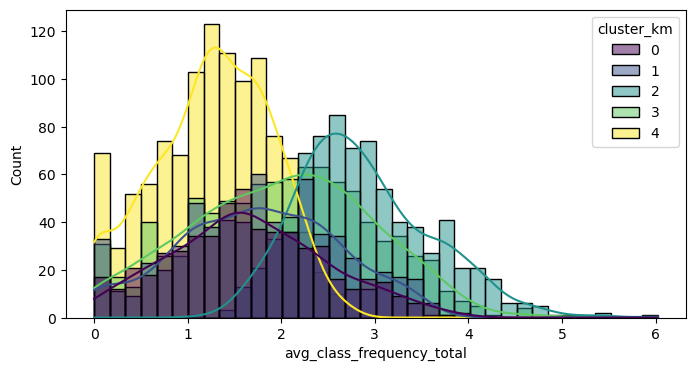

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


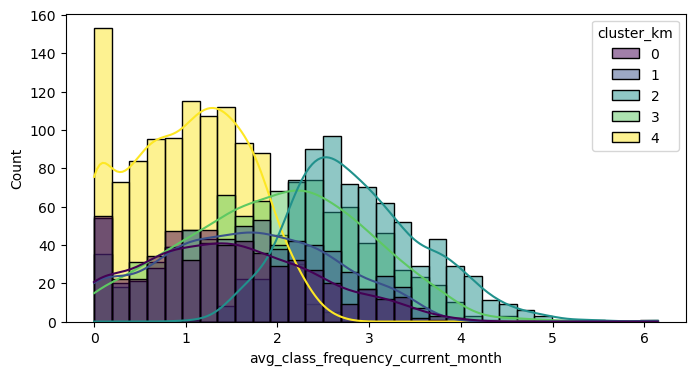

c:\Users\macaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


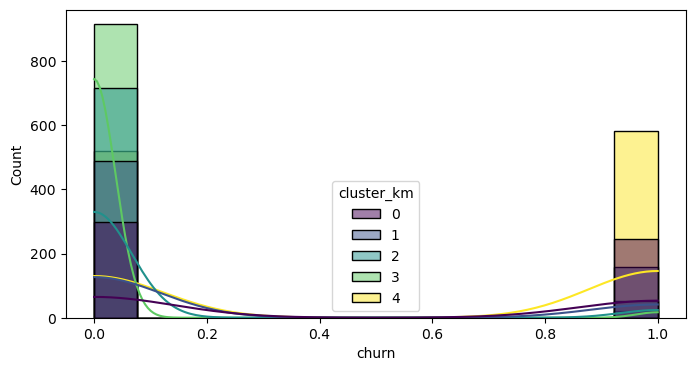

In [31]:
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'churn']
chart(gym, cluster='cluster_km', features=features)

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Perfecto, buen trabajo desplegando los histogramas para estudiar la distribución de las características sujeto a los clusters creados 

El cluster 0 es aquel con mayor permanencia de sus clientes, que además también concentra mayor cantidad de usuarios que llegan por una compañía asociada al gimnasio ("partner") y por la campaña "promo friends". Además; en este cluster también los usuarios suelen contratar mayormente el plan de 12 meses, y asistir a clases grupales. También es uno de los cluster que más gasta en servicios adicionales en el gimnasio y contiene a los clientes con mayor tiempo de vida.  
Por otra parte, tenemos al cluster 2 con los usuarios que más cancelan; son quienes contratan mayormente el plan de 1 mes, tiene clientes que No llegan por "promo friends" ni pertenenecen a alguna compañía "partner".

In [32]:
# Tasa de cancelación por cluster
gym.groupby('cluster_km')['churn'].mean().reset_index()

,cluster_km,churn
0,0,0.450368
1,1,0.245750
2,2,0.067708
3,3,0.022436
4,4,0.528507


¿Qué grupos son propensos a irse y cuáles son leales?
- EL cluster 0 es el que tiene en promedio una menor tasa de cancelación, mientras que el cluster 2 tiene un mayor promedio en tendencia a la cancelación.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Buen trabajo estudiando las tasas de cancelación por clusters.

## Conclusión

Tras el análisis de los diferentes perfiles de usuarios y las características reunidas en el conjunto de datos, fue posible notar que aquellos factores que se relacionan con una mayor fidelización de los clientes son:  
- Que contraten el plan anual.
- Que lleguen al gimnasio por invitación de un amigo.
- Que asistan a sesiones grupales de entrenamiento.
- Que pertenezcan a alguna compañía asociada al gimnasio.

Por lo que se hace relevante apuntar a estas variables para generar estrategias de marketing que contribuyan a fidelizar los clientes de *"Model Fitness"*. 
Para ello, se recomienda lo siguiente:  

- Crear un "programa de Referidos"; para que la campaña "promo friends" sea más exitosa, pues se vió que los clientes que llegan por un amigo tienen menor tasa de cancelación. Para esto se podría generar un descuento exclusivo en el plan mensual para el cliente actual y talvés una tarifa exclusiva en el plan anual para el amigo que se inscriba (considerando que el plan anual también mostró una tendencia a la fidelización).  

- Promover la fidelización de los clientes que contratan su plan anual, ofreciendo un descuento o beneficio, por ej: un % de descuento en la renovación de su Plan Anual, o; beneficios como cierta cantidad de clases grupales gratis o descuentos en servicios adicionales del gimnasio.  

- Crear un "programa de Bienestar Corporativo" considerando que la tendencia a permanecer también se da en los clientes de compañías asociadas, por lo que se podría colaborar con estas compañías ofreciendo algunas clases grupales gratis para sus empleados, y algún descuento en el plan anual o en los servicios adicionales.

- También sería bueno evaluar la experiencia del cliente, y asegurarse de que los nuevos usuarios tengan una experiencia de "onbarding" efectiva, en la cual se les explique cómo aprovechar al máximo las instalaciones y servicios del gimnasio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor </b> <a class="tocSkip"></a>

Excelente, buen trabajo. 